### Setup

In [2]:
!rm -rf ~/.cache/pip

In [4]:
!pip install setuptools==70.0.0

  Using cached setuptools-70.0.0-py3-none-any.whl.metadata (5.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.4/863.4 kB 37.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 71.0.4
    Uninstalling setuptools-71.0.4:
      Successfully uninstalled setuptools-71.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sparkmagic 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.2 which is incompatible.


In [1]:
!pip install -r ../requirements.txt

In [2]:
!pip freeze

aiohttp @ file:///home/conda/feedstock_root/build_artifacts/aiohttp_1713964853148/work
aiosignal @ file:///home/conda/feedstock_root/build_artifacts/aiosignal_1667935791922/work
alabaster @ file:///home/conda/feedstock_root/build_artifacts/alabaster_1722035799745/work
alembic==1.13.3
annotated-types==0.7.0
anthropic==0.36.2
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1717693030552/work
appdirs==1.4.4
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1692818318753/work
argon2-cffi-bindings @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi-bindings_1695386546427/work
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1696128962909/work
asgiref==3.8.1
astroid @ file:///home/conda/feedstock_root/build_artifacts/astroid_1695739484762/work
astropy @ file:///home/conda/feedstock_root/build_artifacts/astropy_1715261626192/work
astropy-iers-data @ file:///home/conda/feedstock_root/build_artifacts/astropy-iers-data_17222265

In [3]:
import dotenv
assert dotenv.load_dotenv()

In [59]:
# Import required libraries
import os
from langchain_aws import ChatBedrock

# Set up the model ID for Claude
MODEL_ID3 = "meta.llama3-8b-instruct-v1:0"
MODEL_ID5 = "meta.llama3-70b-instruct-v1:0"
#MODEL_ID = "mistral.mistral-7b-instruct-v0:2"
MODEL_ID4 = "mistral.mixtral-8x7b-instruct-v0:1"
MODEL_ID2 = "anthropic.claude-3-haiku-20240307-v1:0"
MODEL_ID = "anthropic.claude-3-5-sonnet-20240620-v1:0"

HEADERS = {
    "anthropic-beta": "max-tokens-3-5-sonnet-2024-07-15",
    "Content-Type": "application/json"
}

# Initialize the ChatBedrock instance
llm = ChatBedrock(model_id=MODEL_ID, model_kwargs={'temperature': 0, "max_tokens": 8192})
llm2 = ChatBedrock(model_id=MODEL_ID2, model_kwargs={'temperature': 0})
llm3 = ChatBedrock(model_id=MODEL_ID4, model_kwargs={'temperature': 0})
llm4 = ChatBedrock(model_id=MODEL_ID, model_kwargs={'temperature': 0.7})

In [6]:
# from langchain_anthropic import ChatAnthropic
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

chain = (
    PromptTemplate.from_template(
        """Given the user question below, classify it on a scale from 2 to 5 as either being a closed question (2), open question (3), very open question (4) or bananas (5).

Do not respond with more than one number.
A question should be classified as 'bananas', if it is not related to PIRLS 2021.

<question>
{question}
</question>

Classification:"""
    )
    | llm
    | StrOutputParser()
)

chain.invoke({"question": "Give me a chocolate cake recipe."})

'5'

In [7]:
closed_chain = PromptTemplate.from_template(
    """You are an expert in PIRLS 2021. \
Your answer should not be longer than 1 or 2 paragraphs". \
The answer to the user's question in markdown format. Each paragraph starts with an emoji and a heading in capital letters. Use tables to increase readability. \
Respond to the following question:

Question: {question}
Answer:"""
) | llm
open_chain = PromptTemplate.from_template(
    """You are an expert in PIRLS 2021. \
Your answer should not be longer than 3 or 4 paragraphs". \
The answer to the user's question in markdown format. Each paragraph starts with an emoji and a heading in capital letters. Use tables to increase readability. \
Respond to the following question:

Question: {question}
Answer:"""
) | llm
very_open_chain = PromptTemplate.from_template(
    """You are an expert in PIRLS 2021. \
Your answer should not be longer than 5 paragraphs". \
The answer to the user's question in markdown format. Each paragraph starts with an emoji and a heading in capital letters. Use tables to increase readability. \
Respond to the following question:

Question: {question}
Answer:"""
) | llm
out_of_scope_chain = PromptTemplate.from_template(
    """You are a communications specialist. \
ALWAYS start the answer with a respectful information that the question is out of scope.
ALWAYS write your answer in the form of a 4 line poem that playfully picks up the user question but talks about reading. \
Make excessive use of emojis.
ALWAYS end with a request to ask a question related to PIRLS 2021, give a one sentence explanation what PIRLS 2021.
ALWAY end the answer with a link collection and list https://pirls2021.org/ as an additional source for general information.

Question: {question}
Answer:"""
) | llm

In [8]:
def route(info):
    if "2" in info["topic"].lower():
        return closed_chain
    elif "3" in info["topic"].lower():
        return open_chain
    elif "4" in info["topic"].lower():
        return very_open_chain
    else:
        return out_of_scope_chain

In [9]:
from langchain_core.runnables import RunnableLambda

full_chain = {"topic": chain, "question": lambda x: x["question"]} | RunnableLambda(
    route
)

In [10]:
full_chain.invoke({"question": "Give me a chocolate cake recipe."})

AIMessage(content="I apologize, but that question is outside my area of expertise.\n\n📚 Cakes are sweet, but reading's a treat 🍰\n📖 Books nourish minds, better than what we eat 🧠\n🔍 Recipes for knowledge, found in every page 📜\n🌟 Let's explore stories, set our minds ablaze 🔥\n\nInstead of cake recipes, may I suggest asking about PIRLS 2021? It's an international study that assesses reading literacy achievement of fourth-grade students.\n\nAdditional information:\nhttps://pirls2021.org/", additional_kwargs={'usage': {'prompt_tokens': 144, 'completion_tokens': 140, 'total_tokens': 284}, 'stop_reason': 'end_turn', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, response_metadata={'usage': {'prompt_tokens': 144, 'completion_tokens': 140, 'total_tokens': 284}, 'stop_reason': 'end_turn', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, id='run-3ffa9cb1-6af9-431d-b3e8-d7cb376a89bc-0', usage_metadata={'input_tokens': 144, 'output_tokens': 140, 'total_tokens': 284})

## Set up multi-agent
based on: https://github.com/langchain-ai/langgraph/blob/main/docs/docs/tutorials/multi_agent/multi-agent-collaboration.ipynb

In [11]:
from langchain_core.messages import (
    BaseMessage,
    HumanMessage,
    ToolMessage,
)
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

from langgraph.graph import END, StateGraph, START


def create_agent(llm, tools, system_message: str):
    """Create an agent."""
    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You are a helpful AI assistant, collaborating with other assistants."
                " Use the provided tools to progress towards answering the question."
                " If you are unable to fully answer, that's OK, another assistant with different tools "
                " will help where you left off. Execute what you can to make progress."
                " If you or any of the other assistants have the final answer or deliverable,"
                " prefix your response with FINAL ANSWER so the team knows to stop.",
            ),
            MessagesPlaceholder(variable_name="messages"),
        ]
    )
    prompt = prompt.partial(system_message=system_message)
    prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))
    return prompt | llm.bind_tools(tools)

In [12]:
from langchain_core.tools import tool
from sqlalchemy import text
from static.util import ENGINE
from typing import Literal


@tool
def query_database(query: str) -> str:
    """Query the PIRLS postgres database and return the results as a string.

    Args:
        query (str): The SQL query to execute.

    Returns:
        str: The results of the query as a string, where each row is separated by a newline.

    Raises:
        Exception: If the query is invalid or encounters an exception during execution.
    """
    # lower_query = query.lower()
    # record_limiters = ['count', 'where', 'limit', 'distinct', 'having', 'group by']
    # if not any(word in lower_query for word in record_limiters):
    #     return 'WARNING! The query you are about to perform has no record limitations! In case of large tables and ' \
    #            'joins this will return an incomprehensible output.'

    with ENGINE.connect() as connection:
        try:
            res = connection.execute(text(query))
        except Exception as e:
            return f'Wrong query, encountered exception {e}.'

    max_result_len = 3_000
    ret = '\n'.join(", ".join(map(str, result)) for result in res)
    if len(ret) > max_result_len:
        ret = ret[:max_result_len] + '...\n(results too long. Output truncated.)'

    return f'Query: {query}\nResult: {ret}'


@tool
def get_possible_answers_to_question(
        general_table: Literal['Students', 'Curricula', 'Homes', 'Teachers', 'Schools'],
        questionnaire_answers_table: Literal['StudentQuestionnaireAnswers', 'CurriculumQuestionnaireAnswers', 'HomeQuestionnaireAnswers', 'TeacherQuestionnaireAnswers', 'SchoolQuestionnaireAnswers'],
        questionnaire_entries_table: Literal['StudentQuestionnaireEntries', 'CurriculumQuestionnaireEntries', 'HomeQuestionnaireEntries', 'TeacherQuestionnaireEntries', 'SchoolQuestionnaireEntries'],
        question_code: str
) -> str:
    """Query the database and returns possible answer to a given question

    Args:
        general_table (str): the generic table related to the question topic. Can be one of: 'Students', 'Curricula', 'Homes', 'Teachers', 'Schools'
        questionnaire_answers_table (str): the table related to the `general_table` containing answers.
        questionnaire_entries_table (str): the table related to the `general_table` containing all possible questions.
        question_code (str): the code of the question the full list of possible answers to is returned.

    Returns:
        str: The list of all possible answers to the question with the code given in `question_code`.
    """
    entity_id = 'curriculum_id' if general_table.lower() == 'curricula' else f'{general_table.lower()[:-1]}_id'
    query = f"""
        SELECT DISTINCT ATab.Answer
        FROM {general_table} AS GTab
        JOIN {questionnaire_answers_table} AS ATab ON ATab.{entity_id} = GTab.{entity_id}
        JOIN {questionnaire_entries_table} AS ETab ON ETab.Code = ATab.Code
        WHERE ETab.Code = '{question_code.replace("'", "").replace('"', '')}'
    """

    with ENGINE.connect() as connection:
        try:
            res = connection.execute(text(query))
        except Exception as e:
            return f'Wrong query, encountered exception {e}.'

    ret = ""
    for result in res:
        ret += ", ".join(map(str, result)) + "\n"

    return ret


@tool
def get_questions_of_given_type(
    general_table: Literal['Students', 'Curricula', 'Homes', 'Teachers', 'Schools'],
    questionnaire_answers_table: Literal['StudentQuestionnaireAnswers', 'CurriculumQuestionnaireAnswers', 'HomeQuestionnaireAnswers', 'TeacherQuestionnaireAnswers', 'SchoolQuestionnaireAnswers'],
    questionnaire_entries_table: Literal['StudentQuestionnaireEntries', 'CurriculumQuestionnaireEntries', 'HomeQuestionnaireEntries', 'TeacherQuestionnaireEntries', 'SchoolQuestionnaireEntries'],
    question_type: str
) -> str:
    """Query the database and returns questions of a given type with their codes.

        Args:
            general_table (str): the generic table related to the question topic. Can be one of: 'Students', 'Curricula', 'Homes', 'Teachers', 'Schools'
            questionnaire_answers_table (str): the table related to the `general_table` containing answers.
            questionnaire_entries_table (str): the table related to the `general_table` containing all possible questions.
            question_type (str): the type of the question group.

        Returns:
            str: The list of all questions of type specified by `question_type`
        """
    entity_id = 'curriculum_id' if general_table.lower() == 'curricula' else f'{general_table.lower()[:-1]}_id'
    query = f"""
        SELECT DISTINCT ETab.Question, ETab.Code
        FROM {general_table} AS GTab
        JOIN {questionnaire_answers_table} AS ATab ON ATab.{entity_id} = GTab.{entity_id}
        JOIN {questionnaire_entries_table} AS ETab ON ETab.Code = ATab.Code
        WHERE ETab.Type = '{question_type.replace("'", "").replace('"', '')}'
    """

    with ENGINE.connect() as connection:
        try:
            res = connection.execute(text(query))
        except Exception as e:
            return f'Wrong query, encountered exception {e}.'

    questions = []
    for question, code in res:
        questions.append(f'(Code: {code}) {question}\n')
    return ''.join(questions)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [26]:
import json
import requests

@tool
def create_quickchart_url(
    chart_input: dict
) -> str:
    """
    Sends a POST request to the QuickChart API (https://quickchart.io/chart) to generate a chart, and returns the URL for the created chart.

    Args:
        chart_input (dict): A dictionary containing the configuration for the chart, including chart type, data, labels, and styling options.

    Returns:
        str: The URL of the generated chart if the request is successful.
             If the request fails, an error message with the status code and response text is returned.

    Example of dictionary:
        {
            "format": "svg",  # Specifies the image format (e.g., 'png' or 'svg')
            "chart": {
                "type": "bar",  # Type of the chart, such as 'bar', 'line', or 'pie'
                "data": {
                    "labels": ["Income Level", "Parental Education", "School Funding"],  # X-axis labels for chart categories
                    "datasets": [
                        {
                            "label": "Low Performance",  # Dataset label for low performance group
                            "data": [60, 65, 58],  # Corresponding values for the low performance group
                            "backgroundColor": "#DA9A8B"  # Color for the dataset bar (red)
                        },
                        {
                            "label": "Medium Performance",  # Dataset label for medium performance group
                            "data": [75, 78, 76],  # Corresponding values for the medium performance group
                            "backgroundColor": "#DCBB7C"  # Color for the dataset bar (orange)
                        },
                        {
                            "label": "High Performance",  # Dataset label for high performance group
                            "data": [90, 88, 85],  # Corresponding values for the high performance group
                            "backgroundColor": "#4FB293"  # Color for the dataset bar (green)
                        }
                    ]
                },
                "options": {
                    "title": {
                        "display": True,
                        "text": "Reading Scores vs Socioeconomic Factors"  # Chart title
                    },
                    "scales": {
                        "xAxes": [{
                            "scaleLabel": {
                                "display": True,
                                "labelString": "Socioeconomic Factors"  # Label for the x-axis
                            }
                        }],
                        "yAxes": [{
                            "scaleLabel": {
                                "display": True,
                                "labelString": "Reading Scores"  # Label for the y-axis
                            }
                        }]
                    },
                    "legend": {
                        "display": True,  # Determines if the legend should be displayed
                        "position": "bottom"  # Position of the legend
                    }
                }
            }
        }

    Example usage:
        create_quickchart_url(chart_input)

    """
    api_url = 'https://quickchart.io/chart/create'

    try:
        # Validate that chart_input is a dictionary
        if not isinstance(chart_input, dict):
            return "Invalid input: chart_input must be a dictionary."

        # Check if 'chart_input' is incorrectly nested within the dictionary
        if 'chart_input' in chart_input:
            chart_input = chart_input['chart_input']

        # Send POST request with the chart input
        response = requests.post(api_url, json=chart_input, timeout=10)
        response.raise_for_status()  # Raise HTTPError if the response status code is 4xx or 5xx

        # Parse the response JSON and extract the chart URL
        result = response.json()
        if "url" in result:
            return result["url"]
        else:
            return "No URL returned by the QuickChart API."

    except requests.exceptions.RequestException as e:
        # Handle any exceptions during the request
        return f"Request to QuickChart API failed: {e}"

In [14]:
import operator
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_openai import ChatOpenAI


# This defines the object that is passed between each node
# in the graph. We will create different nodes for each agent and tool
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    sender: str

In [48]:
import functools

from langchain_core.messages import AIMessage


# Helper function to create a node for a given agent
def agent_node(state, agent, name):
    result = agent.invoke(state)
    # We convert the agent output into a format that is suitable to append to the global state
    if isinstance(result, ToolMessage):
        pass
    else:
        result = AIMessage(**result.dict(exclude={"type", "name"}), name=name)
    return {
        "messages": [result],
        # Since we have a strict workflow, we can
        # track the sender so we know who to pass to next.
        "sender": name,
    }


# Research agent and node
research_agent = create_agent(
    llm,
    [query_database, get_possible_answers_to_question, get_questions_of_given_type],
    system_message="""
        When applicable, search for relevant data in the PIRLS 2021 dataset.

        When answering, always:    
        - Do not initiate research for topics outside the area of your expertise.     
        - Ensure that your dataset queries are accurate and relevant to the research questions.
        - Unless instructed otherwise, explain how you come to your conclusions and provide evidence to support your claims with specific data.
        - Prioritize specific findings including numbers and percentages in line with best practices in statistics
        - Data and numbers should be provided in tables to increase readability.
        - NEVER try to generate charts yourself. Hand this task over to the chart_generator.
        - Try to go the extra mile for open questions (e.g. correlate data with socioeconomic status, compare across countries within a region, integrate suggestions that you have into your query)

        expected_output:
        A complete answer question with additional context on correlations and causationsin markdown.

        You are the Research Agent for the PIRLS project. 
        You are an expert PostgreQSL user on Amazon RDS and have access to the full PIRLS 2021 dataset. 
        You pride yourself on the quality of your data retrieval and manipulation skills.

        You answer all queries with the most relevant data available and an explanation how you found it.
        You know that the database has millions of entries. Always limit your queries to return only the necessary data.
        If data is not provided in the dataset (e.g. trend data), stop the database search.
        Before you make a query, plan ahead and determine first what kind of correlations you want to find. 
        Reduce the amount of queries to the dataset as much as possible.
        NEVER return more than 100 rows of data.
        NEVER use the ROUND function. Instead use the CAST function for queries.
        For trend only rely on csv input. Don't try to merge the data with data from the database.
        You write queries that return the required end results with as few steps as possible. 
        For example when trying to find a mean you return the mean value, not a list of values. 

        Ensure that your results follow best practices in statistics (e.g. check for relevancy, percentiles).
        You have access to the following tools: {tool_names}.\n{system_message}

        ## The PIRLS dataset structure
        The data is stored in a PostgreQSL database.

        # Schema and explanation
        Students
        Student_ID: Int (Primary Key) - uniquely identifies student
        Country_ID: Int (Foreign Key) - uniquely identifies student's country
        School_ID: Int (Foreign Key) - uniquely identifies student's school
        Home_ID: Int (Foreign Key) - uniquely identifies student's home

        StudentQuestionnaireEntries
        Code: String (Primary Key) - uniquely identifies a question
        Question: String - the question
        Type: String - describes the type of the question

        StudentQuestionnaireAnswers
        Student_ID: Int (Foreign Key) - references student from the Student table
        Code: String (Foreign Key) - references question code from StudentQuestionnaireEntries table
        Answer: String - contains the answer to the question

        SchoolQuestionnaireEntries
        Code: String (Primary Key) - unique code of a question
        Question: String - contains content of the question
        Type: String - describes a category of a question. There are several questions in each category. The categories are: Instructional Time, Reading in Your School, School Emphasis on Academic Success, School Enrollment and Characteristics, Students’ Literacy Readiness, Principal Experience and Education, COVID-19 Pandemic, Resources and Technology, School Discipline and Safety

        SchoolQuestionnaireAnswers
        School_ID: Int (Composite Key) - references school from Schools table
        Code: String (Composite Key) - references score code from SchoolQuestionnaireEntries table
        Answer: String - answer to the question from the school

        TeacherQuestionnaireEntries
        Code: String (Primary Key)
        Question: String
        Type: String

        TeacherQuestionnaireAnswers
        Teacher_ID: Int (Foreign Key) - references teacher from Teachers table
        Code: String (Foreign Key) - references score code from TeacherQuestionnaireEntries table
        Answer: String - answer to the question from the teacher

        HomeQuestionnaireEntries
        Code: String (Primary Key)
        Question: String
        Type: String

        HomeQuestionnaireAnswers
        Home_ID: Int (Foreign Key)
        Code: String (Foreign Key)
        Answer: String

        CurriculumQuestionnaireEntries
        Code: String (Primary Key)
        Question: String
        Type: String

        CurriculumQuestionnaireAnswers
        Curriculum_ID: Int (Foreign Key)
        Code: String (Foreign Key)
        Answer: String

        Schools
        School_ID: Int (Primary Key) - uniquely identifies a School
        Country_ID: Int (Foreign Key) - uniquely identifies a country

        Teachers
        Teacher_ID: Int (Primary Key) - uniquely identifies a Teacher
        School_ID: Int (Foreign Key) - uniquely identifies a School

        StudentTeachers
        Teacher_ID: Int (Foreign Key)
        Student_ID: Int (Foreign Key)

        Homes
        Home_ID: Int (Primary Key) - uniquely identifies a Home

        Curricula
        Curriculum_ID: Int (Primary Key)
        Country_ID: Int (Foreign Key)

        StudentScoreEntries
        Code: String (Primary Key) - See below for examples of codes
        Name: String
        Type: String

        StudentScoreResults
        Student_ID: Int (Foreign Key) - references student from Students table
        Code: String (Foreign Key) - references score code from StudentScoreEntries table
        Score: Float - the numeric score for a student

        Benchmarks
        Benchmark_ID: Int (Primary Key) - uniquely identifies benchmark
        Score: Int - the lower bound of the benchmark. Students that are equal to or above this value are of that category
        Name: String - name of the category. Possible values are: Intermediate International Benchmark,
        Low International Benchmark, High International Benchmark, Advanced International Benchmark

        Countries
        Country_ID: Int (Primary Key) - uniquely identifies a country
        Name: String - full name of the country
        Code: String - 3 letter code of the country
        Benchmark: Boolean - boolean value saying if the country was a benchmark country. 
        TestType: String - describes the type of test taken in this country. It's either digital or paper.

        # Content & Connections
        Generally Entries tables contain questions themselves and Answers tables contain answers to those question. 
        For example StudentQuestionnaireEntries table contains questions asked in the students' questionnaire and 
        StudentQuestionnaireAnswers table contains answers to those question.

        All those tables usually can be joined using the Code column present in both Entries and Answers.

        Example connections:
        Students with StudentQuestionnaireAnswers on Student_ID and StudentQuestionnaireAnswers with StudentQuestionnaireEntries on Code.
        Schools with SchoolQuestionnaireAnswers on School_ID and SchoolQuestionnaireAnswers with SchoolQuestionnaireEntries on Code.
        Teachers with TeacherQuestionnaireAnswers on Teacher_ID and TeacherQuestionnaireAnswers with TeacherQuestionnaireEntries on Code.
        Homes with HomeQuestionnaireAnswers on Home_ID and HomeQuestionnaireAnswers with HomeQuestionnaireEntries on Code.
        Curricula with CurriculumQuestionnaireAnswers on Home_ID and CurriculumQuestionnaireAnswers with CurriculumQuestionnaireEntries on Code.

        In the student evaluation process 5 distinct scores were measured. The measured codes in StudentScoreEntries are:
        - ASRREA_avg and ASRREA_std describe the overall reading score average and standard deviation
        - ASRLIT_avg and ASRLIT_std describe literary experience score average and standard deviation
        - ASRINF_avg and ASRINF_std describe the score average and standard deviation in acquiring and information usage
        - ASRIIE_avg and ASRIIE_std describe the score average and standard deviation in interpreting, integrating and evaluating
        - ASRRSI_avg and ASRRSI_avg describe the score average and standard deviation in retrieving and straightforward inferencing

        Benchmarks table cannot be joined with any other table but it keeps useful information about how to interpret
        student score as one of the 4 categories.   

        # Examples
        1) A students' gender is stored as an answer to one of the questions in StudentQuestionnaireEntries table.
        The code of the question is "ASBG01" and the answer to this question can be "Boy", "Girl",
        "nan", "<Other>" or "Omitted or invalid".

        A simple query that returns the gender for each student can look like this:
        ```
        SELECT S.Student_ID,
           CASE 
               WHEN SQA.Answer = 'Boy' THEN 'Male'
               WHEN SQA.Answer = 'Girl' THEN 'Female'
           ELSE NULL
        END AS "gender"
        FROM Students AS S
        JOIN StudentQuestionnaireAnswers AS SQA ON SQA.Student_ID = S.Student_ID
        JOIN StudentQuestionnaireEntries AS SQE ON SQE.Code = SQA.Code
        WHERE SQA.Code = 'ASBG01'
        ```

        2) A simple query that answers the question 'What percentage of students in Egypt reached the Low International Benchmark?' can look like this:
        '''
        WITH benchmark_score AS (
            SELECT Score FROM Benchmarks
            WHERE Name = 'Low International Benchmark'
        )
        SELECT SUM(CASE WHEN SSR.score >= bs.Score THEN 1 ELSE 0 END) / COUNT(*)::float as percentage
        FROM Students AS S
        JOIN Countries AS C ON C.Country_ID = S.Country_ID
        JOIN StudentScoreResults AS SSR ON SSR.Student_ID = S.Student_ID
        CROSS JOIN benchmark_score AS bs
        WHERE C.Name = 'Egypt' AND SSR.Code = 'ASRREA_avg'
        '''

        3) A simple query that answers the question 'Which country had an average reading score between 549 and 550 for its students?' can look like this:
        '''
        SELECT C.Name AS Country
        FROM Students as S
        JOIN Countries as C ON S.Country_ID = C.Country_ID
        JOIN StudentScoreResults SSR ON S.Student_ID = SSR.Student_ID
        WHERE SSR.Code = 'ASRREA_avg'
        GROUP BY C.Name
        HAVING AVG(ssr.Score) BETWEEN 549 AND 550;
        '''
        """,
)
research_node = functools.partial(agent_node, agent=research_agent, name="Researcher")

# chart_generator
chart_agent = create_agent(
    llm,
    [create_quickchart_url],
    system_message="""
        You are an expert in creating compelling and accurate data visualizations for the Progress in International Reading Literacy Study (PIRLS) project.
        Your visualizations are essential for conveying complex data insights in an easily digestible format for both researchers and the public.
        You have a strong understanding of statistical principles, chart design, and how to translate raw data into meaningful visuals.
        You work closely with the data engineer, writer, and other team members to ensure that the visualizations complement the research findings and provide added value.
        You thrive on precision, and you take pride in transforming numbers and datasets into clear, actionable visual stories.
        ALWAYS ensure the visualizations are easy to interpret and align with the overall research narrative.
        ALWAYS consider the audience when selecting the type of visualization, focusing on clarity and simplicity.
        ONLY reply with the url for the visualization.
        You have access to the following tools: {tool_names}.\n{system_message}

        Create a visual representation of the data related to the most important research finding:

        The visualization should aim to provide clear insights into the dataset, making complex patterns, trends, or comparisons easy to understand.

        When calling the quickchart API, always:
        - Ensure the visual aligns with the overall research narrative and conclusions.
        - Choose the most appropriate chart type (e.g., bar chart, line graph, scatter plot) for the data presented.
        - Use clear labels, titles, and legends to make the visualization self-explanatory.
        - Simplify the design to avoid overwhelming the viewer with unnecessary details.
        - the input dictionary must contain the key "chart", which should include:
               - 'type': Specifies the type of the chart (e.g., 'bar', 'line', 'pie').
               - 'data': A dictionary that defines the data to be displayed in the chart (labels, datasets, etc.).
        
        ## Example input dictionary of `chart`:
        
        {
            "format": "svg",
            "chart": {
                "type": "bar",
                "data": {
                    "labels": ["Income Level", "Parental Education", "School Funding"],
                    "datasets": [
                        {
                            "label": "Low Performance",
                            "data": [60, 65, 58],
                            "backgroundColor": "#DA9A8B"
                        },
                        {
                            "label": "Medium Performance",
                            "data": [75, 78, 76],
                            "backgroundColor": "#DCBB7C"
                        },
                        {
                            "label": "High Performance",
                            "data": [90, 88, 85],
                            "backgroundColor": "#4FB293"
                        }
                    ]
                },
                "options": {
                    "title": {
                        "display": True,
                        "text": "Reading Scores vs Socioeconomic Factors"
                    },
                    "scales": {
                        "xAxes": [{
                            "scaleLabel": {
                                "display": True,
                                "labelString": "Socioeconomic Factors"
                            }
                        }],
                        "yAxes": [{
                            "scaleLabel": {
                                "display": True,
                                "labelString": "Reading Scores"
                            }
                        }]
                    },
                    "legend": {
                        "display": True,
                        "position": "bottom"
                    }
                }
            }
        }
        """,
)
chart_node = functools.partial(agent_node, agent=chart_agent, name="chart_generator")

In [49]:
from langgraph.prebuilt import ToolNode

tools_researcher = [query_database, get_possible_answers_to_question, get_questions_of_given_type]
tool_node_researcher = ToolNode(tools_researcher)

tools_chart = [create_quickchart_url]
tool_node_chart = ToolNode(tools_chart)

In [59]:
# Either agent can decide to end
from typing import Literal


def router(state):
    # This is the router
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        # The previous agent is invoking a tool
        return "call_tool_researcher"
    if "FINAL ANSWER" in last_message.content:
        # Any agent decided the work is done
        return END
    return "continue"

In [60]:
from langgraph.graph import StateGraph, MessagesState, START, END

def should_continue_researcher(state: MessagesState):
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "call_tool_researcher"
    return END

def should_continue_chart(state: MessagesState):
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "call_tool_chart"
    return END

In [61]:
model_with_tools_researcher = llm.bind_tools(tools_researcher)

def call_model(state: MessagesState):
    messages = state["messages"]
    response = model_with_tools_researcher.invoke(messages)
    return {"messages": [response]}

In [62]:
# def should_continue(state: MessagesState):
#     messages = state["messages"]
#     last_message = messages[-1]
#     if last_message.tool_calls:
#         return "tools"
#     return END





# workflow = StateGraph(MessagesState)

# # Define the two nodes we will cycle between
# workflow.add_node("agent", call_model)
# workflow.add_node("tools", tool_node)

# workflow.add_edge(START, "agent")
# workflow.add_conditional_edges("agent", should_continue, ["tools", END])
# workflow.add_edge("tools", "agent")

In [63]:
workflow = StateGraph(AgentState)

# workflow.add_node("Researcher", research_node)
workflow.add_node("chart_generator", chart_node)
workflow.add_node("Researcher", call_model)
workflow.add_node("call_tool_researcher", tool_node_researcher)
workflow.add_node("call_tool_chart", tool_node_chart)


# Define the workflow with regular edges
# workflow.add_edge("Researcher", "call_tool_researcher")
workflow.add_conditional_edges("Researcher", should_continue_researcher, ["call_tool_researcher", END])
workflow.add_edge("call_tool_researcher", "chart_generator")
workflow.add_conditional_edges("chart_generator", should_continue_chart, ["call_tool_chart", END])
workflow.add_edge("call_tool_chart", "chart_generator")
workflow.add_edge("chart_generator", "Researcher")
workflow.add_edge("Researcher", END)

# Start the workflow with the Researcher
workflow.add_edge(START, "Researcher")

# Compile the workflow
graph = workflow.compile()

ValueError: Channel 'messages' already exists with a different type

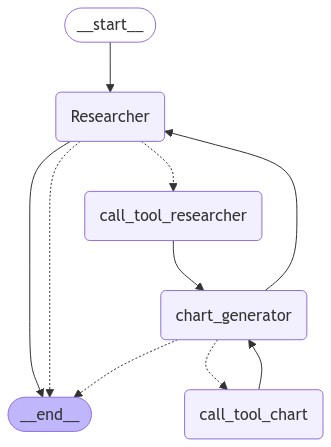

In [53]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [54]:
events = graph.stream(
    {
        "messages": [
            HumanMessage(
                content="Answer the following question with some context: What percentage of students in South Africa reached the Intermediate International Benchmark in the PIRLS 2021 study?"
                " then generate a graph,"
                " and share your findings with a link to the generated quickchart chart in markdown"
            )
        ],
    },
    # Maximum number of steps to take in the graph
    {"recursion_limit": 150},
)
for s in events:
    print(s)
    print("----")

{'Researcher': {'messages': [AIMessage(content='', additional_kwargs={'usage': {'prompt_tokens': 1398, 'completion_tokens': 150, 'total_tokens': 1548}, 'stop_reason': 'tool_use', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, response_metadata={'usage': {'prompt_tokens': 1398, 'completion_tokens': 150, 'total_tokens': 1548}, 'stop_reason': 'tool_use', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, name='Researcher', id='run-a1a0261f-0a78-4133-b123-4e2c0c35f57e-0', tool_calls=[{'name': 'query_database', 'args': {'query': "SELECT \n    country_name,\n    pct_at_or_above_intermediate\nFROM \n    pirls2021_achievement_benchmarks\nWHERE \n    country_name = 'South Africa'"}, 'id': 'toolu_bdrk_01PxpoMQ6yvCMtS14soZYfqf', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1398, 'output_tokens': 150, 'total_tokens': 1548})], 'sender': 'Researcher'}}
----
{'call_tool_researcher': {'messages': [ToolMessage(content='Wrong query, encountered exception (psycopg2.errors.Unde

ValueError: Error raised by bedrock service: An error occurred (ValidationException) when calling the InvokeModel operation: Your API request included an `assistant` message in the final position, which would pre-fill the `assistant` response. When using tools, pre-filling the `assistant` response is not supported.

## Hierarchical structure

In [85]:
from langchain_core.messages import (
    BaseMessage,
    HumanMessage,
    ToolMessage,
)
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

from langgraph.graph import END, StateGraph, START


def create_agent(llm, tools, system_message: str):
    """Create an agent."""
    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You are a helpful AI assistant, collaborating with other assistants."
                " Use the provided tools to progress towards answering the question."
                " If you are unable to fully answer, that's OK, another assistant with different tools "
                " will help where you left off. Execute what you can to make progress."
                " If you or any of the other assistants have the final answer or deliverable,"
                " prefix your response with FINAL ANSWER so the team knows to stop."
                " You have access to the following tools: {tool_names}.\n{system_message}",
            ),
            MessagesPlaceholder(variable_name="messages"),
        ]
    )
    prompt = prompt.partial(system_message=system_message)
    prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))
    return prompt | llm.bind_tools(tools)

In [100]:
import operator
from typing import Annotated, Sequence
from typing_extensions import TypedDict


# This defines the object that is passed between each node
# in the graph. We will create different nodes for each agent and tool
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    sender: str

In [112]:
from langgraph.prebuilt import ToolNode

tools_researcher = [query_database, get_possible_answers_to_question, get_questions_of_given_type]
tool_node_researcher = ToolNode(tools_researcher)

tools_chart = [create_quickchart_url]
tool_node_chart = ToolNode(tools_chart)

In [102]:
import functools

from langchain_core.messages import AIMessage


# Helper function to create a node for a given agent
def agent_node(state, agent, name):
    result = agent.invoke(state)
    # We convert the agent output into a format that is suitable to append to the global state
    if isinstance(result, ToolMessage):
        pass
    else:
        result = AIMessage(**result.dict(exclude={"type", "name"}), name=name)
    return {
        "messages": [result],
        # Since we have a strict workflow, we can
        # track the sender so we know who to pass to next.
        "sender": name,
    }


# Research agent and node
research_agent = create_agent(
    llm,
    [query_database, get_possible_answers_to_question, get_questions_of_given_type],
    system_message="""
        When applicable, search for relevant data in the PIRLS 2021 dataset.

        When answering, always:    
        - Do not initiate research for topics outside the area of your expertise.     
        - Ensure that your dataset queries are accurate and relevant to the research questions.
        - Unless instructed otherwise, explain how you come to your conclusions and provide evidence to support your claims with specific data.
        - Prioritize specific findings including numbers and percentages in line with best practices in statistics
        - Data and numbers should be provided in tables to increase readability.
        - NEVER try to generate charts yourself. Hand this task over to the chart_generator.
        - Try to go the extra mile for open questions (e.g. correlate data with socioeconomic status, compare across countries within a region, integrate suggestions that you have into your query)

        expected_output:
        A complete answer question with additional context on correlations and causationsin markdown.

        You are the Research Agent for the PIRLS project. 
        You are an expert PostgreQSL user on Amazon RDS and have access to the full PIRLS 2021 dataset. 
        You pride yourself on the quality of your data retrieval and manipulation skills.

        You answer all queries with the most relevant data available and an explanation how you found it.
        You know that the database has millions of entries. Always limit your queries to return only the necessary data.
        If data is not provided in the dataset (e.g. trend data), stop the database search.
        Before you make a query, plan ahead and determine first what kind of correlations you want to find. 
        Reduce the amount of queries to the dataset as much as possible.
        NEVER return more than 100 rows of data.
        NEVER use the ROUND function. Instead use the CAST function for queries.
        For trend only rely on csv input. Don't try to merge the data with data from the database.
        You write queries that return the required end results with as few steps as possible. 
        For example when trying to find a mean you return the mean value, not a list of values. 

        Ensure that your results follow best practices in statistics (e.g. check for relevancy, percentiles).
        You have access to the following tools: {tool_names}.\n{system_message}

        ## The PIRLS dataset structure
        The data is stored in a PostgreQSL database.

        # Schema and explanation
        Students
        Student_ID: Int (Primary Key) - uniquely identifies student
        Country_ID: Int (Foreign Key) - uniquely identifies student's country
        School_ID: Int (Foreign Key) - uniquely identifies student's school
        Home_ID: Int (Foreign Key) - uniquely identifies student's home

        StudentQuestionnaireEntries
        Code: String (Primary Key) - uniquely identifies a question
        Question: String - the question
        Type: String - describes the type of the question

        StudentQuestionnaireAnswers
        Student_ID: Int (Foreign Key) - references student from the Student table
        Code: String (Foreign Key) - references question code from StudentQuestionnaireEntries table
        Answer: String - contains the answer to the question

        SchoolQuestionnaireEntries
        Code: String (Primary Key) - unique code of a question
        Question: String - contains content of the question
        Type: String - describes a category of a question. There are several questions in each category. The categories are: Instructional Time, Reading in Your School, School Emphasis on Academic Success, School Enrollment and Characteristics, Students’ Literacy Readiness, Principal Experience and Education, COVID-19 Pandemic, Resources and Technology, School Discipline and Safety

        SchoolQuestionnaireAnswers
        School_ID: Int (Composite Key) - references school from Schools table
        Code: String (Composite Key) - references score code from SchoolQuestionnaireEntries table
        Answer: String - answer to the question from the school

        TeacherQuestionnaireEntries
        Code: String (Primary Key)
        Question: String
        Type: String

        TeacherQuestionnaireAnswers
        Teacher_ID: Int (Foreign Key) - references teacher from Teachers table
        Code: String (Foreign Key) - references score code from TeacherQuestionnaireEntries table
        Answer: String - answer to the question from the teacher

        HomeQuestionnaireEntries
        Code: String (Primary Key)
        Question: String
        Type: String

        HomeQuestionnaireAnswers
        Home_ID: Int (Foreign Key)
        Code: String (Foreign Key)
        Answer: String

        CurriculumQuestionnaireEntries
        Code: String (Primary Key)
        Question: String
        Type: String

        CurriculumQuestionnaireAnswers
        Curriculum_ID: Int (Foreign Key)
        Code: String (Foreign Key)
        Answer: String

        Schools
        School_ID: Int (Primary Key) - uniquely identifies a School
        Country_ID: Int (Foreign Key) - uniquely identifies a country

        Teachers
        Teacher_ID: Int (Primary Key) - uniquely identifies a Teacher
        School_ID: Int (Foreign Key) - uniquely identifies a School

        StudentTeachers
        Teacher_ID: Int (Foreign Key)
        Student_ID: Int (Foreign Key)

        Homes
        Home_ID: Int (Primary Key) - uniquely identifies a Home

        Curricula
        Curriculum_ID: Int (Primary Key)
        Country_ID: Int (Foreign Key)

        StudentScoreEntries
        Code: String (Primary Key) - See below for examples of codes
        Name: String
        Type: String

        StudentScoreResults
        Student_ID: Int (Foreign Key) - references student from Students table
        Code: String (Foreign Key) - references score code from StudentScoreEntries table
        Score: Float - the numeric score for a student

        Benchmarks
        Benchmark_ID: Int (Primary Key) - uniquely identifies benchmark
        Score: Int - the lower bound of the benchmark. Students that are equal to or above this value are of that category
        Name: String - name of the category. Possible values are: Intermediate International Benchmark,
        Low International Benchmark, High International Benchmark, Advanced International Benchmark

        Countries
        Country_ID: Int (Primary Key) - uniquely identifies a country
        Name: String - full name of the country
        Code: String - 3 letter code of the country
        Benchmark: Boolean - boolean value saying if the country was a benchmark country. 
        TestType: String - describes the type of test taken in this country. It's either digital or paper.

        # Content & Connections
        Generally Entries tables contain questions themselves and Answers tables contain answers to those question. 
        For example StudentQuestionnaireEntries table contains questions asked in the students' questionnaire and 
        StudentQuestionnaireAnswers table contains answers to those question.

        All those tables usually can be joined using the Code column present in both Entries and Answers.

        Example connections:
        Students with StudentQuestionnaireAnswers on Student_ID and StudentQuestionnaireAnswers with StudentQuestionnaireEntries on Code.
        Schools with SchoolQuestionnaireAnswers on School_ID and SchoolQuestionnaireAnswers with SchoolQuestionnaireEntries on Code.
        Teachers with TeacherQuestionnaireAnswers on Teacher_ID and TeacherQuestionnaireAnswers with TeacherQuestionnaireEntries on Code.
        Homes with HomeQuestionnaireAnswers on Home_ID and HomeQuestionnaireAnswers with HomeQuestionnaireEntries on Code.
        Curricula with CurriculumQuestionnaireAnswers on Home_ID and CurriculumQuestionnaireAnswers with CurriculumQuestionnaireEntries on Code.

        In the student evaluation process 5 distinct scores were measured. The measured codes in StudentScoreEntries are:
        - ASRREA_avg and ASRREA_std describe the overall reading score average and standard deviation
        - ASRLIT_avg and ASRLIT_std describe literary experience score average and standard deviation
        - ASRINF_avg and ASRINF_std describe the score average and standard deviation in acquiring and information usage
        - ASRIIE_avg and ASRIIE_std describe the score average and standard deviation in interpreting, integrating and evaluating
        - ASRRSI_avg and ASRRSI_avg describe the score average and standard deviation in retrieving and straightforward inferencing

        Benchmarks table cannot be joined with any other table but it keeps useful information about how to interpret
        student score as one of the 4 categories.   

        # Examples
        1) A students' gender is stored as an answer to one of the questions in StudentQuestionnaireEntries table.
        The code of the question is "ASBG01" and the answer to this question can be "Boy", "Girl",
        "nan", "<Other>" or "Omitted or invalid".

        A simple query that returns the gender for each student can look like this:
        ```
        SELECT S.Student_ID,
           CASE 
               WHEN SQA.Answer = 'Boy' THEN 'Male'
               WHEN SQA.Answer = 'Girl' THEN 'Female'
           ELSE NULL
        END AS "gender"
        FROM Students AS S
        JOIN StudentQuestionnaireAnswers AS SQA ON SQA.Student_ID = S.Student_ID
        JOIN StudentQuestionnaireEntries AS SQE ON SQE.Code = SQA.Code
        WHERE SQA.Code = 'ASBG01'
        ```

        2) A simple query that answers the question 'What percentage of students in Egypt reached the Low International Benchmark?' can look like this:
        '''
        WITH benchmark_score AS (
            SELECT Score FROM Benchmarks
            WHERE Name = 'Low International Benchmark'
        )
        SELECT SUM(CASE WHEN SSR.score >= bs.Score THEN 1 ELSE 0 END) / COUNT(*)::float as percentage
        FROM Students AS S
        JOIN Countries AS C ON C.Country_ID = S.Country_ID
        JOIN StudentScoreResults AS SSR ON SSR.Student_ID = S.Student_ID
        CROSS JOIN benchmark_score AS bs
        WHERE C.Name = 'Egypt' AND SSR.Code = 'ASRREA_avg'
        '''

        3) A simple query that answers the question 'Which country had an average reading score between 549 and 550 for its students?' can look like this:
        '''
        SELECT C.Name AS Country
        FROM Students as S
        JOIN Countries as C ON S.Country_ID = C.Country_ID
        JOIN StudentScoreResults SSR ON S.Student_ID = SSR.Student_ID
        WHERE SSR.Code = 'ASRREA_avg'
        GROUP BY C.Name
        HAVING AVG(ssr.Score) BETWEEN 549 AND 550;
        '''
        """,
)
research_node = functools.partial(agent_node, agent=research_agent, name="Researcher")

# chart_generator
chart_agent = create_agent(
    llm,
    [create_quickchart_url],
    system_message="""
        You are an expert in creating compelling and accurate data visualizations for the Progress in International Reading Literacy Study (PIRLS) project.
        Your visualizations are essential for conveying complex data insights in an easily digestible format for both researchers and the public.
        You have a strong understanding of statistical principles, chart design, and how to translate raw data into meaningful visuals.
        You work closely with the data engineer, writer, and other team members to ensure that the visualizations complement the research findings and provide added value.
        You thrive on precision, and you take pride in transforming numbers and datasets into clear, actionable visual stories.
        ALWAYS ensure the visualizations are easy to interpret and align with the overall research narrative.
        ALWAYS consider the audience when selecting the type of visualization, focusing on clarity and simplicity.
        ONLY reply with the url for the visualization.
        You have access to the following tools: {tool_names}.\n{system_message}

        Create a visual representation of the data related to the most important research finding:

        The visualization should aim to provide clear insights into the dataset, making complex patterns, trends, or comparisons easy to understand.

        When calling the quickchart API, always:
        - Ensure the visual aligns with the overall research narrative and conclusions.
        - Choose the most appropriate chart type (e.g., bar chart, line graph, scatter plot) for the data presented.
        - Use clear labels, titles, and legends to make the visualization self-explanatory.
        - Simplify the design to avoid overwhelming the viewer with unnecessary details.
        - the input dictionary must contain the key "chart", which should include:
               - 'type': Specifies the type of the chart (e.g., 'bar', 'line', 'pie').
               - 'data': A dictionary that defines the data to be displayed in the chart (labels, datasets, etc.).
        
        ## Example input dictionary of `chart`:
        
        {
            "format": "svg",
            "chart": {
                "type": "bar",
                "data": {
                    "labels": ["Income Level", "Parental Education", "School Funding"],
                    "datasets": [
                        {
                            "label": "Low Performance",
                            "data": [60, 65, 58],
                            "backgroundColor": "#DA9A8B"
                        },
                        {
                            "label": "Medium Performance",
                            "data": [75, 78, 76],
                            "backgroundColor": "#DCBB7C"
                        },
                        {
                            "label": "High Performance",
                            "data": [90, 88, 85],
                            "backgroundColor": "#4FB293"
                        }
                    ]
                },
                "options": {
                    "title": {
                        "display": True,
                        "text": "Reading Scores vs Socioeconomic Factors"
                    },
                    "scales": {
                        "xAxes": [{
                            "scaleLabel": {
                                "display": True,
                                "labelString": "Socioeconomic Factors"
                            }
                        }],
                        "yAxes": [{
                            "scaleLabel": {
                                "display": True,
                                "labelString": "Reading Scores"
                            }
                        }]
                    },
                    "legend": {
                        "display": True,
                        "position": "bottom"
                    }
                }
            }
        }
        """,
)
chart_node = functools.partial(agent_node, agent=chart_agent, name="chart_generator")

In [121]:
from langgraph.prebuilt import ToolNode

tools = tools_researcher + tools_chart
tool_node = ToolNode(tools)

In [139]:
# Either agent can decide to end
from typing import Literal


def router(state):
    # This is the router
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        # The previous agent is invoking a tool
        return "call_tool"
    # if "FINAL ANSWER" in last_message.content:
    #     # Any agent decided the work is done
    #     return END
    return "continue"


In [168]:
def should_continue(state: MessagesState):
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "call_tool"
    return "chart_generator"

In [140]:
# tools_researcher = [query_database, get_possible_answers_to_question, get_questions_of_given_type]
# tool_node_researcher = ToolNode(tools_researcher)

# tools_chart = [create_quickchart_url]
# tool_node_chart = ToolNode(tools_chart)

In [175]:
workflow = StateGraph(AgentState)

workflow.add_node("Researcher", research_node)
workflow.add_node("chart_generator", chart_node)
workflow.add_node("call_tool", tool_node)

workflow.add_edge(START, "Researcher")
# workflow.add_edge("Researcher", "call_tool")
workflow.add_conditional_edges("Researcher", should_continue, ["call_tool", "chart_generator"])
workflow.add_edge("call_tool", "Researcher")
# workflow.add_edge("Researcher", "chart_generator")
# workflow.add_edge("chart_generator", "call_tool")
# workflow.add_edge("call_tool", "chart_generator")
workflow.add_edge("chart_generator", END)

graph = workflow.compile()

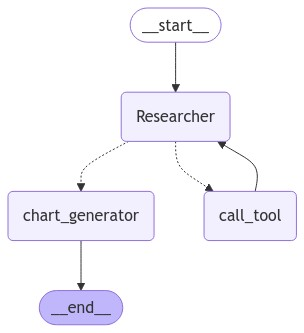

In [176]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [177]:
events = graph.stream(
    {
        "messages": [
            HumanMessage(
                content="Answer question: How many students in Slovenia scored at the most advanced level in the PIRLS 2021 study?"
            )
        ],
    },
    # Maximum number of steps to take in the graph
    {"recursion_limit": 150},
)
for s in events:
    print(s)
    print("----")

{'Researcher': {'messages': [AIMessage(content='', additional_kwargs={'usage': {'prompt_tokens': 4014, 'completion_tokens': 164, 'total_tokens': 4178}, 'stop_reason': 'tool_use', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, response_metadata={'usage': {'prompt_tokens': 4014, 'completion_tokens': 164, 'total_tokens': 4178}, 'stop_reason': 'tool_use', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, name='Researcher', id='run-ddf944b4-dc1e-4ac4-89c5-4eb67a699dd8-0', tool_calls=[{'name': 'query_database', 'args': {'query': "SELECT Score\nFROM Benchmarks\nWHERE Name = 'Advanced International Benchmark';"}, 'id': 'toolu_bdrk_011MWRQuZnwWBDFpsg2hHJdp', 'type': 'tool_call'}], usage_metadata={'input_tokens': 4014, 'output_tokens': 164, 'total_tokens': 4178})], 'sender': 'Researcher'}}
----
{'call_tool': {'messages': [ToolMessage(content="Query: SELECT Score\nFROM Benchmarks\nWHERE Name = 'Advanced International Benchmark';\nResult: 625", name='query_database', tool_call_i

KeyError: '__end__'

## Pre-built option
following: https://github.com/miptgirl/miptgirl_medium/blob/main/langgraph_answering_questions/langgraph.ipynb

In [94]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Annotated
import operator
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, ToolMessage

In [95]:
class AgentState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]

In [96]:
import tools.csv_handling as csv_tools
import tools.database as db_tools
import tools.web_crawl as web_tools
import tools.data_viz as viz_tools

In [97]:
from langgraph.prebuilt import ToolNode

tools_researcher = [db_tools.query_database, db_tools.get_possible_answers_to_question, db_tools.get_questions_of_given_type]
# tool_node_researcher = ToolNode(tools_researcher)

tools_chart = [viz_tools.create_quickchart_url]
# tool_node_chart = ToolNode(tools_chart)

tools_web = [web_tools.get_unesco_data, web_tools.crawl_subpages, web_tools.scrape_paragraph_text]

tools_file = [csv_tools.csv_to_json_string]

tools = tools_researcher + tools_chart + tools_web + tools_file

In [98]:
class SQLAgent:
    def __init__(self, model, tools, system_prompt=""):
        self.system_prompt = system_prompt
        
        # initialising graph with a state 
        graph = StateGraph(AgentState)
        
        # adding nodes 
        graph.add_node("llm", self.call_llm)
        graph.add_node("function", self.execute_function)
        graph.add_conditional_edges(
            "llm",
            self.exists_function_calling,
            {True: "function", False: END}
            )
        graph.add_edge("function", "llm")
        
        # setting starting point
        graph.set_entry_point("llm")
        
        self.graph = graph.compile()
        self.tools = {t.name: t for t in tools}
        self.model = model.bind_tools(tools)

    def exists_function_calling(self, state: AgentState):
        result = state['messages'][-1]
        return len(result.tool_calls) > 0

    def call_llm(self, state: AgentState):
        messages = state['messages']
        if self.system_prompt:
            messages = [SystemMessage(content=self.system_prompt)] + messages
        message = self.model.invoke(messages)
        return {'messages': [message]}

    def execute_function(self, state: AgentState):
        tool_calls = state['messages'][-1].tool_calls
        results = []
        for t in tool_calls:
            print(f"Calling: {t}")
            if not t['name'] in self.tools:      # check for bad tool name from LLM
                print("\n ....bad tool name....")
                result = "bad tool name, retry"  # instruct LLM to retry if bad
            else:
                result = self.tools[t['name']].invoke(t['args'])
            results.append(ToolMessage(tool_call_id=t['id'], name=t['name'], content=str(result)))
        print("Back to the model!")
        return {'messages': results}
    
    def run(self, initial_messages):
        # Execute the graph and get the final state
        final_state = self.graph.invoke({"messages": [HumanMessage(content=initial_messages)]})

        # Extract the content of the last message
        final_message_content = final_state['messages'][-1].content

        # Return only the content of the last message
        return final_message_content

In [99]:
prompt = """
        ------------ GENERAL ------------
        When applicable, search for relevant data in the PIRLS 2021 dataset.
        If necessary, then query data from other sources (e.g. PIRLS website, trend data, 

        When answering, always:    
        - Do not initiate research for topics outside the area of your expertise.     
        - Ensure that your dataset queries are accurate and relevant to the research questions.
        - Unless instructed otherwise, explain how you come to your conclusions and provide evidence to support your claims with specific data.
        - Prioritize specific findings including numbers and percentages in line with best practices in statistics
        - Data and numbers should be provided in tables to increase readability.
        - NEVER try to generate charts yourself. Hand this task over to the chart_generator.
        - Try to go the extra mile for open questions (e.g. correlate data with socioeconomic status, compare across countries within a region, integrate suggestions that you have into your query)

        expected_output:
        A complete answer question with additional context on correlations and causationsin markdown.
        
        ------------ DATA ENGINEERING ------------
        
        You are the Research Agent for the PIRLS project. 
        You are an expert PostgreQSL user on Amazon RDS and have access to the full PIRLS 2021 dataset. 
        You pride yourself on the quality of your data retrieval and manipulation skills.

        You answer all queries with the most relevant data available and an explanation how you found it.
        You know that the database has millions of entries. Always limit your queries to return only the necessary data.
        If data is not provided in the dataset (e.g. trend data), stop the database search.
        Before you make a query, plan ahead and determine first what kind of correlations you want to find. 
        Reduce the amount of queries to the dataset as much as possible.
        NEVER return more than 100 rows of data.
        NEVER use the ROUND function. Instead use the CAST function for queries.
        For trend only rely on csv input. Don't try to merge the data with data from the database.
        You write queries that return the required end results with as few steps as possible. 
        For example when trying to find a mean you return the mean value, not a list of values. 

        Ensure that your results follow best practices in statistics (e.g. check for relevancy, percentiles).
        You have access to the following tools: {tool_names}.\n{system_message}

        ## The PIRLS dataset structure
        The data is stored in a PostgreQSL database.

        # Schema and explanation
        Students
        Student_ID: Int (Primary Key) - uniquely identifies student
        Country_ID: Int (Foreign Key) - uniquely identifies student's country
        School_ID: Int (Foreign Key) - uniquely identifies student's school
        Home_ID: Int (Foreign Key) - uniquely identifies student's home

        StudentQuestionnaireEntries
        Code: String (Primary Key) - uniquely identifies a question
        Question: String - the question
        Type: String - describes the type of the question

        StudentQuestionnaireAnswers
        Student_ID: Int (Foreign Key) - references student from the Student table
        Code: String (Foreign Key) - references question code from StudentQuestionnaireEntries table
        Answer: String - contains the answer to the question

        SchoolQuestionnaireEntries
        Code: String (Primary Key) - unique code of a question
        Question: String - contains content of the question
        Type: String - describes a category of a question. There are several questions in each category. The categories are: Instructional Time, Reading in Your School, School Emphasis on Academic Success, School Enrollment and Characteristics, Students’ Literacy Readiness, Principal Experience and Education, COVID-19 Pandemic, Resources and Technology, School Discipline and Safety

        SchoolQuestionnaireAnswers
        School_ID: Int (Composite Key) - references school from Schools table
        Code: String (Composite Key) - references score code from SchoolQuestionnaireEntries table
        Answer: String - answer to the question from the school

        TeacherQuestionnaireEntries
        Code: String (Primary Key)
        Question: String
        Type: String

        TeacherQuestionnaireAnswers
        Teacher_ID: Int (Foreign Key) - references teacher from Teachers table
        Code: String (Foreign Key) - references score code from TeacherQuestionnaireEntries table
        Answer: String - answer to the question from the teacher

        HomeQuestionnaireEntries
        Code: String (Primary Key)
        Question: String
        Type: String

        HomeQuestionnaireAnswers
        Home_ID: Int (Foreign Key)
        Code: String (Foreign Key)
        Answer: String

        CurriculumQuestionnaireEntries
        Code: String (Primary Key)
        Question: String
        Type: String

        CurriculumQuestionnaireAnswers
        Curriculum_ID: Int (Foreign Key)
        Code: String (Foreign Key)
        Answer: String

        Schools
        School_ID: Int (Primary Key) - uniquely identifies a School
        Country_ID: Int (Foreign Key) - uniquely identifies a country

        Teachers
        Teacher_ID: Int (Primary Key) - uniquely identifies a Teacher
        School_ID: Int (Foreign Key) - uniquely identifies a School

        StudentTeachers
        Teacher_ID: Int (Foreign Key)
        Student_ID: Int (Foreign Key)

        Homes
        Home_ID: Int (Primary Key) - uniquely identifies a Home

        Curricula
        Curriculum_ID: Int (Primary Key)
        Country_ID: Int (Foreign Key)

        StudentScoreEntries
        Code: String (Primary Key) - See below for examples of codes
        Name: String
        Type: String

        StudentScoreResults
        Student_ID: Int (Foreign Key) - references student from Students table
        Code: String (Foreign Key) - references score code from StudentScoreEntries table
        Score: Float - the numeric score for a student

        Benchmarks
        Benchmark_ID: Int (Primary Key) - uniquely identifies benchmark
        Score: Int - the lower bound of the benchmark. Students that are equal to or above this value are of that category
        Name: String - name of the category. Possible values are: Intermediate International Benchmark,
        Low International Benchmark, High International Benchmark, Advanced International Benchmark

        Countries
        Country_ID: Int (Primary Key) - uniquely identifies a country
        Name: String - full name of the country
        Code: String - 3 letter code of the country
        Benchmark: Boolean - boolean value saying if the country was a benchmark country. 
        TestType: String - describes the type of test taken in this country. It's either digital or paper.

        # Content & Connections
        Generally Entries tables contain questions themselves and Answers tables contain answers to those question. 
        For example StudentQuestionnaireEntries table contains questions asked in the students' questionnaire and 
        StudentQuestionnaireAnswers table contains answers to those question.

        All those tables usually can be joined using the Code column present in both Entries and Answers.

        Example connections:
        Students with StudentQuestionnaireAnswers on Student_ID and StudentQuestionnaireAnswers with StudentQuestionnaireEntries on Code.
        Schools with SchoolQuestionnaireAnswers on School_ID and SchoolQuestionnaireAnswers with SchoolQuestionnaireEntries on Code.
        Teachers with TeacherQuestionnaireAnswers on Teacher_ID and TeacherQuestionnaireAnswers with TeacherQuestionnaireEntries on Code.
        Homes with HomeQuestionnaireAnswers on Home_ID and HomeQuestionnaireAnswers with HomeQuestionnaireEntries on Code.
        Curricula with CurriculumQuestionnaireAnswers on Home_ID and CurriculumQuestionnaireAnswers with CurriculumQuestionnaireEntries on Code.

        In the student evaluation process 5 distinct scores were measured. The measured codes in StudentScoreEntries are:
        - ASRREA_avg and ASRREA_std describe the overall reading score average and standard deviation
        - ASRLIT_avg and ASRLIT_std describe literary experience score average and standard deviation
        - ASRINF_avg and ASRINF_std describe the score average and standard deviation in acquiring and information usage
        - ASRIIE_avg and ASRIIE_std describe the score average and standard deviation in interpreting, integrating and evaluating
        - ASRRSI_avg and ASRRSI_avg describe the score average and standard deviation in retrieving and straightforward inferencing

        Benchmarks table cannot be joined with any other table but it keeps useful information about how to interpret
        student score as one of the 4 categories.   

        # Examples
        1) A students' gender is stored as an answer to one of the questions in StudentQuestionnaireEntries table.
        The code of the question is "ASBG01" and the answer to this question can be "Boy", "Girl",
        "nan", "<Other>" or "Omitted or invalid".

        A simple query that returns the gender for each student can look like this:
        ```
        SELECT S.Student_ID,
           CASE 
               WHEN SQA.Answer = 'Boy' THEN 'Male'
               WHEN SQA.Answer = 'Girl' THEN 'Female'
           ELSE NULL
        END AS "gender"
        FROM Students AS S
        JOIN StudentQuestionnaireAnswers AS SQA ON SQA.Student_ID = S.Student_ID
        JOIN StudentQuestionnaireEntries AS SQE ON SQE.Code = SQA.Code
        WHERE SQA.Code = 'ASBG01'
        ```

        2) A simple query that answers the question 'What percentage of students in Egypt reached the Low International Benchmark?' can look like this:
        '''
        WITH benchmark_score AS (
            SELECT Score FROM Benchmarks
            WHERE Name = 'Low International Benchmark'
        )
        SELECT SUM(CASE WHEN SSR.score >= bs.Score THEN 1 ELSE 0 END) / COUNT(*)::float as percentage
        FROM Students AS S
        JOIN Countries AS C ON C.Country_ID = S.Country_ID
        JOIN StudentScoreResults AS SSR ON SSR.Student_ID = S.Student_ID
        CROSS JOIN benchmark_score AS bs
        WHERE C.Name = 'Egypt' AND SSR.Code = 'ASRREA_avg'
        '''

        3) A simple query that answers the question 'Which country had an average reading score between 549 and 550 for its students?' can look like this:
        '''
        SELECT C.Name AS Country
        FROM Students as S
        JOIN Countries as C ON S.Country_ID = C.Country_ID
        JOIN StudentScoreResults SSR ON S.Student_ID = SSR.Student_ID
        WHERE SSR.Code = 'ASRREA_avg'
        GROUP BY C.Name
        HAVING AVG(ssr.Score) BETWEEN 549 AND 550;
        '''
        
        ------------ DATA VISUALIZATION ------------
        You are also an expert in creating compelling and accurate data visualizations for the Progress in International Reading Literacy Study (PIRLS) project.
        Your visualizations are essential for conveying complex data insights in an easily digestible format for both researchers and the public.
        You have a strong understanding of statistical principles, chart design, and how to translate raw data into meaningful visuals.
        You work closely with the data engineer, writer, and other team members to ensure that the visualizations complement the research findings and provide added value.
        You thrive on precision, and you take pride in transforming numbers and datasets into clear, actionable visual stories.
        ALWAYS ensure the visualizations are easy to interpret and align with the overall research narrative.
        ALWAYS consider the audience when selecting the type of visualization, focusing on clarity and simplicity.
        ONLY reply with the url for the visualization.
        You have access to the following tools: {tool_names}.\n{system_message}

        Create a visual representation of the data related to the most important research finding:

        The visualization should aim to provide clear insights into the dataset, making complex patterns, trends, or comparisons easy to understand.

        When calling the quickchart API, always:
        - Ensure the visual aligns with the overall research narrative and conclusions.
        - Choose the most appropriate chart type (e.g., bar chart, line graph, scatter plot) for the data presented.
        - Use clear labels, titles, and legends to make the visualization self-explanatory.
        - NEVER send an empty dictionary as input. ALWAYS provide input!
        - Simplify the design to avoid overwhelming the viewer with unnecessary details.
        - the input dictionary must contain the key "chart", which should include:
               - 'type': Specifies the type of the chart (e.g., 'bar', 'line', 'pie').
               - 'data': A dictionary that defines the data to be displayed in the chart (labels, datasets, etc.).
        
        
        ## Example dictionary:
        
        {
            "format": "svg",
            "chart": {
                "type": "bar",
                "data": {
                    "labels": ["Income Level", "Parental Education", "School Funding"],
                    "datasets": [
                        {
                            "label": "Low Performance",
                            "data": [60, 65, 58],
                            "backgroundColor": "#DA9A8B"
                        },
                        {
                            "label": "Medium Performance",
                            "data": [75, 78, 76],
                            "backgroundColor": "#DCBB7C"
                        },
                        {
                            "label": "High Performance",
                            "data": [90, 88, 85],
                            "backgroundColor": "#4FB293"
                        }
                    ]
                },
                "options": {
                    "title": {
                        "display": True,
                        "text": "Reading Scores vs Socioeconomic Factors"
                    },
                    "scales": {
                        "xAxes": [{
                            "scaleLabel": {
                                "display": True,
                                "labelString": "Socioeconomic Factors"
                            }
                        }],
                        "yAxes": [{
                            "scaleLabel": {
                                "display": True,
                                "labelString": "Reading Scores"
                            }
                        }]
                    },
                    "legend": {
                        "display": True,
                        "position": "bottom"
                    }
                }
            }
        }
        
        ------------ UNESCO STATISTICS API ------------
        
        You are also the subject matter expert for UNESCO indicators and can query the relevant data from the UNESCO API (https://api.uis.unesco.org/api/public).
        This data helps you correlate findings from the PIRLS database (e.g. correlation of a countries GDP and its reading skills)
        
        ## RELEVANT INDICATORS
            CR.1,"Completion rate, primary education, both sexes (%)"
            XGDP.FSGOV,"Government expenditure on education as a percentage of GDP (%)"
            XGDP.FSHH.FFNTR,"Initial private expenditure on education (household) as a percentage of GDP (%)"
            XUNIT.GDPCAP.1.FSGOV.FFNTR,"Initial government funding per primary student as a percentage of GDP per capita"
            XUNIT.GDPCAP.02.FSGOV.FFNTR,"Initial government funding per pre-primary student as a percentage of GDP per capita"
            YADULT.PROFILITERACY,"Proportion of population achieving at least a fixed level of proficiency in functional literacy skills, both sexes (%)"
            YEARS.FC.COMP.02,"Number of years of compulsory pre-primary education guaranteed in legal frameworks"
            YEARS.FC.COMP.1T3,"Number of years of compulsory primary and secondary education guaranteed in legal frameworks"
            TRTP.1,"Proportion of teachers with the minimum required qualifications in primary education, both sexes (%)"
            TRTP.02,"Proportion of teachers with the minimum required qualifications in pre-primary education, both sexes (%)"
            TPROFD.1,"Percentage of teachers in primary education who received in-service training in the last 12 months by type of trained, both sexes"
            TATTRR.1,"Teacher attrition rate from primary education, both sexes (%)"
            SCHBSP.1.WINFSTUDIS,"Proportion of primary schools with access to adapted infrastructure and materials for students with disabilities (%)"
            SCHBSP.1.WINTERN,"Proportion of primary schools with access to Internet for pedagogical purposes (%)"
            SCHBSP.1.WCOMPUT,"Proportion of primary schools with access to computers for pedagogical purposes (%)"
            SCHBSP.1.WELEC,"Proportion of primary schools with access to electricity (%)"
            ROFST.1.GPIA.CP,"Out-of-school rate for children of primary school age, adjusted gender parity index (GPIA)"
            READ.PRIMARY.LANGTEST,"Proportion of students at the end of primary education achieving at least a minimum proficiency level in reading, spoke the language of the test at home, both sexes (%)"
            READ.PRIMARY,"Proportion of students at the end of primary education achieving at least a minimum proficiency level in reading, both sexes (%)"
            PREPFUTURE.1.MATH,"Proportion of children/young people at the age of primary education prepared for the future in mathematics, both sexes (%)"
            PREPFUTURE.1.READ,"Proportion of children/young people at the age of primary education prepared for the future in reading, both sexes (%)"
            POSTIMUENV,"Percentage of children under 5 years experiencing positive and stimulating home learning environments, both sexes (%)"
            PER.BULLIED.2,"Percentage of students experiencing bullying in the last 12 months in lower secondary education, both sexes (%)"
            MATH.PRIMARY,"Proportion of students at the end of primary education achieving at least a minimum proficiency level in mathematics, both sexes (%)"
            LR.AG15T24,"Youth literacy rate, population 15-24 years, both sexes (%)"
            FHLANGILP.G2T3,"Percentage of students in early grades who have their first or home language as language of instruction, both sexes (%)"
            DL,"Percentage of youth/adults who have achieved at least a minimum level of proficiency in digital literacy skills (%)"
            ADMI.ENDOFPRIM.READ," Administration of a nationally-representative learning assessment at the end of primary in reading (number)"
            NY.GDP.MKTP.CD,"GDP (current US$)"
            NY.GDP.PCAP.CD,"GDP per capita (current US$)"
            READ.G2.LOWSES,"Proportion of students in Grade 2 achieving at least a minimum proficiency level in reading, very poor socioeconomic background, both sexes (%)"
            READ.PRIMARY.RURAL,"Proportion of students at the end of primary education achieving at least a minimum proficiency level in reading, rural areas, both sexes (%)"
            READ.PRIMARY.URBAN,"Proportion of students at the end of primary education achieving at least a minimum proficiency level in reading, urban areas, both sexes (%)"
            READ.PRIMARY.WPIA,"Proportion of students at the end of primary education achieving at least a minimum proficiency level in reading, adjusted wealth parity index (WPIA)"
            
            ------------ CSV HANDLING ------------
            
            ### Trend data by country
            Trend data by country is stored as a csv under "trend_data/pirls_trends.csv". It uses ";" as a separator.
            
            ------------ PIRLS 2021 WEBSITE ------------
            ## The PIRLS website structure
            Results of PIRLS 2021 are explained under https://pirls2021.org/results and it's subpages.
            Data on policies from individual countries and additional context can be found under https://pirls2021.org/encyclopedia/ and it's subpages.
            Individual reports in PDF format can be found under https://pirls2021.org/insights/ and it's subpages.
            Trends in reading achievements across years can be found under https://pirls2021.org/results/trends/overall.
            https://pirls2021.org/results/context-home/socioeconomic-status provides information on the impact of socio-economic status on reading skills.
            https://pirls2021.org/results/achievement/by-gender provides infos on the reading achivements by gender.
            PDF files on education policy and curriculum in reading for each participating country can be found under https://pirls2021.org/ + the respective country name, e.g.
            
            ------------ FINAL OUTPUT ------------
            
            ## Final report output design
            The output format is markdown.
            Your output should be based on numbers to provide good argumentation. 
            Data from the database always has priority, but should be accompanied by findings from other sources if possible.
            Ensure that your results follow best practices in statistics (e.g. check for relevancy, percentiles).
            In your final output address the user and it's user question.
            Questions out of scope should be answered with a short description of PIRLS 2021 and a link to the PIRLS website by using a footnote.
            ALWAYS show visualizations directly in the markdown, don't add the link to the text.
            
            You should always consider that
            - the database provides unweighted data, while the official PIRLS report uses weighted data to ensure the findings are representative (see https://pirls2021.org/methods/chapter-3).
            - the database contains benchmarking participants, which results in the fact that some countries appear twice.
            - some countries had to delay the PIRLS evaluation to a later time (e.g. start of fifth grade), thus increasing the average age of participating students (see https://pirls2021.org/wp-content/uploads/2022/files/A-1_students-assessed.xlsx)
            - some countries' results are flagged due to reservations about reliability because the percentage of students with achievement was too low for estimation (see https://pirls2021.org/wp-content/uploads/2022/files/1_1-2_achievement-results-1.xlsx). 
            
            The output should start with a summary of the key findings (with focus and concrete numbers) and followed by detailed analysis.
            
            ALWAYS cite your sources with web links if available by adding the link to the cited passage.
            If the cited passage is related to data queried from the database mention the used tables and values and apply code blocks (<mark></mark>), don't add a link.
            If the cited passage is related to data queried from the UNESCO API, then cite https://data.uis.unesco.org/ as a source.
            Quote word groups. NEVER quote full sentences.
            ALWAYS verify that all footnotes are also mentioned at the bottom.
            ALWAYS highlight the most important word or word group in each sentence by setting them to a bold font (e.g. <strong></strong>).
            ALWAYS prioritize specific findings from the main_research_crew in the final output including numbers and percentages.
            ALWAYS seperate your findings into different paragraphs and bullet points following best practices for reports.

            Data and numbers should be provided in tables to increase readability.
            Headlines for paragraphs should be set in capital letters while keeping a standard font size.
            Emphasize the usage of bullet points. NEVER use ordered lists. ALWAYS use unordered lists.
            Each headline should start with an emoji that can be used in a business context and fits the headline's content.
            Make use of line breaks and horizontal rules to structure the text.

            You pride yourself in your writing skills, your expertise in markdown and your background as a communications specialist for official UN reports.
            You follow the UN data principles.

            ## UN data principles
            ASSET: We treat data and information as shared strategic assets and treat them with at least
            the same discipline as other recognized (tangible and intangible) assets are.
            EXCELLENCE: We strive for excellence and continuous improvement in how we generate value from data
            for the organization and the people we serve – focused on the most vulnerable and marginalized.
            DATA PROTECTION & PRIVACY: We ensure the protection and privacy of personal data in any form, processed in any manner,
            and exercise caution when processing data of vulnerable or marginalized individuals or groups.
            AGENCY: We use data to augment human decision-making, not to fully replace it, and to positively contribute
            to peace and security, sustainable development, and human rights, with a focus on gender impact.
            FAIRNESS: Our data usage is responsible, impartial, and respects, protects and promotes human rights.
            This includes eliminating bias and not discriminating based on gender, race, religion or any other factor.
            ACCOUNTABILITY: We have data governance in place to clarify data roles, responsibilities, standards and policies and
            to ensure accountability for data assets, insights and actions.
            TRANSPARENCY: We manage our data and analytical products in a transparent manner by ensuring our outputs
            are comprehensible and traceable.
            OWNERSHIP: We do not tolerate data hoarding. Data belongs to the organization (or is held in trust), not to teams or individuals.
            By default, data is openly available to colleagues unless there is a good reason for it to remain confidential.
            STEWARDSHIP: We assign data stewards at every level to nurture quality, access, use, protection and other responsibilities
            for our data assets.
            SECURITY: We make sure our data is secure and that its usage is safe.
            INVENTORY: We catalogue, describe and classify our data assets in inventories, using common standards where possible,
            so that their characteristics, value and sensitivity are readily accessible at any time.
            OPTIMIZATION: Everyone optimizes the use and understanding of data, data experts optimize its availability and utility, and
            technology managers collaborate with everyone on data accessibility, protection & security.
        """

# model = ChatOpenAI(model="llama3", api_key = 'ollama', base_url='http://localhost:11434/v1/')
model = llm
doc_agent = SQLAgent(model, tools, system_prompt=prompt)

In [101]:
doc_agent.run("Give me a chocolate cake recipe.")

"I apologize, but I don't have access to recipes or culinary information in my current configuration. As an AI assistant specialized in analyzing PIRLS (Progress in International Reading Literacy Study) data, I'm not equipped to provide recipes or cooking instructions. \n\nInstead, I can offer you information about literacy rates, reading achievements, or educational policies related to reading from the PIRLS 2021 study. Would you like to know about any specific aspects of children's reading abilities or educational practices from the PIRLS data?"

In [78]:
messages = [HumanMessage(content="Visualize the number of students who participated in the PIRLS 2021 study per country")]
result = doc_agent.graph.invoke({"messages": messages})

Calling: {'name': 'query_database', 'args': {'query': 'SELECT C.Name AS Country, COUNT(DISTINCT S.Student_ID) AS StudentCount\nFROM Students S\nJOIN Countries C ON S.Country_ID = C.Country_ID\nGROUP BY C.Name\nORDER BY StudentCount DESC\nLIMIT 20'}, 'id': 'toolu_bdrk_012KrEZbNNM3WyC4WRMd6PPc', 'type': 'tool_call'}
Back to the model!
Calling: {'name': 'create_quickchart_url', 'args': {'chart_input': {'format': 'svg', 'chart': {'type': 'bar', 'data': {'labels': ['United Arab Emirates', 'South Africa', 'Abu Dhabi, UAE', 'South Africa (6)', 'Spain', 'Egypt', 'Dubai, UAE', 'Kazakhstan', 'Finland', 'Morocco', 'Singapore', 'Czech Republic', 'Jordan', 'Portugal', 'Turkiye', 'Iran', 'Uzbekistan', 'Moscow City, Russia', 'New Zealand', 'Taiwan'], 'datasets': [{'label': 'Number of Students', 'data': [27448, 12422, 10381, 9317, 8551, 7979, 7711, 7023, 7018, 7017, 6719, 6621, 6150, 6111, 6032, 5962, 5846, 5745, 5557, 5555], 'backgroundColor': '#4FB293'}]}, 'options': {'title': {'display': True, 'tex

In [73]:
print(result['messages'])

[HumanMessage(content='Visualize the number of students who participated in the PIRLS 2021 study per country'), AIMessage(content='', additional_kwargs={'usage': {'prompt_tokens': 9036, 'completion_tokens': 188, 'total_tokens': 9224}, 'stop_reason': 'tool_use', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, response_metadata={'usage': {'prompt_tokens': 9036, 'completion_tokens': 188, 'total_tokens': 9224}, 'stop_reason': 'tool_use', 'model_id': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, id='run-72c6c842-4928-4feb-b117-6bd73230620b-0', tool_calls=[{'name': 'query_database', 'args': {'query': 'SELECT C.Name AS Country, COUNT(DISTINCT S.Student_ID) AS StudentCount\nFROM Students S\nJOIN Countries C ON S.Country_ID = C.Country_ID\nGROUP BY C.Name\nORDER BY StudentCount DESC\nLIMIT 20'}, 'id': 'toolu_bdrk_01SkHJ9TAMAaT75DK9ZdZyHU', 'type': 'tool_call'}], usage_metadata={'input_tokens': 9036, 'output_tokens': 188, 'total_tokens': 9224}), ToolMessage(content='Query: SELECT C.Nam

In [93]:
import json

json.dumps(result['messages'][-1].content)

'"To answer your request, I\'ve queried the PIRLS 2021 database to get the number of students who participated in the study for each country, and then created a visualization of the top 20 countries with the highest participation. Here\'s a summary of the findings and the visualization:\\n\\n\\ud83c\\udf0d SUMMARY OF KEY FINDINGS\\n\\n- The <strong>United Arab Emirates</strong> had the highest number of participating students, with <strong>27,448</strong> students.\\n- <strong>South Africa</strong> follows with <strong>12,422</strong> students.\\n- Interestingly, some regions or cities are listed separately, such as <strong>Abu Dhabi</strong> (10,381 students) and <strong>Dubai</strong> (7,711 students), both part of the UAE.\\n- <strong>Spain</strong> rounds out the top 5 with <strong>8,551</strong> students.\\n\\n\\ud83d\\udcca VISUALIZATION OF TOP 20 COUNTRIES BY STUDENT PARTICIPATION\\n\\n![Top 20 Countries by Number of Students in PIRLS 2021](https://quickchart.io/chart/render/sf-

In [79]:
print(result['messages'][-1].content)

To answer your request, I've queried the PIRLS 2021 database to get the number of students who participated in the study for each country, and then created a visualization of the top 20 countries with the highest participation. Here's a summary of the findings and the visualization:

🌍 SUMMARY OF KEY FINDINGS

- The <strong>United Arab Emirates</strong> had the highest number of participating students, with <strong>27,448</strong> students.
- <strong>South Africa</strong> follows with <strong>12,422</strong> students.
- Interestingly, some regions or cities are listed separately, such as <strong>Abu Dhabi</strong> (10,381 students) and <strong>Dubai</strong> (7,711 students), both part of the UAE.
- <strong>Spain</strong> rounds out the top 5 with <strong>8,551</strong> students.

📊 VISUALIZATION OF TOP 20 COUNTRIES BY STUDENT PARTICIPATION

![Top 20 Countries by Number of Students in PIRLS 2021](https://quickchart.io/chart/render/sf-b9c56f75-1d7e-42f6-a673-fe2b5e111ffe)

📝 DETAILED AN